In [1]:
import requests
import re
import pickle
import datetime
from dateutil.rrule import rrule, MONTHLY
import matplotlib.pyplot as plt  


In [2]:
# fonction  qui pour un mois d'une année extrait le snippet, le lead paragraph, l'abstract et le headline de tous les articles issus du New York Times en utilisant l'API New York Times, et nettoie toutes les chaînes de caractères. Cette renvoie une liste contenant des chaînes de caractères. Les 4 premières chaînes sont les snippet/lead para/abstract/headline du premier article, les 4 d'après celles du deuxième article et ainsi de suite.  

def extraire_mois_en_liste(year,month, fields = ["snippet", "lead_paragraph", "abstract", "headline"]):
    res = list()
    url = f'https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?&api-key='+'i5GTBJVBEnxg9P9BPvNvz3Wv7lRZbUFu'
    r = requests.get(url)
    json_data = r.json()
    ls = json_data["response"]["docs"]
    print(ls)
    for d in ls:
        for k in fields: 
            toadd = None
            if k == "headline": 
                subdico = d[k]
                if isinstance(subdico,dict) and "main" in subdico : 
                    toadd = clean_str(d[k]["main"])
            else : 
                toadd= clean_str(d[k])
            if toadd is not  None: 
                res.append(toadd) 
    return res

In [3]:
# fonction qui save la requête pour le mois (year,month) issue de extraire_mois_en_liste
    
def save_extraction_mois(year,month):
    pickle.dump(extraire_mois_en_liste(year,month), open(str(year)+str(month)+'.pck',"wb"))
    print('ok')
    

In [4]:
# fonction qui nettoie et tokenize une chaîne de caractère - cette fonction prend une chaîne de caractère en entrée et renvoie une chaîne de caractère
    
def clean_str(string, tolower=True):
    """
    Tokenization/string cleaning.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    if  not isinstance(string,str):
        return None
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    if tolower:
        string = string.lower()
    return string.strip()

In [5]:
# fonction qui pour une liste de chaîne de caractères renvoie un dictionnaire avec le nombre d'occurence de chaque mot - il y a autant de keys que de mots, donc wordcount(l)['mot']=nombre d'occurences du mot 'mot'

def wordcount (listofsentences):
    count = {}
    for sent in listofsentences:
        for w in sent.split():
            if w in count:
                count[w]+=1
            else : 
                count[w] = 1
    return count


In [6]:
# fonction qui pour un dico contenant les mots (qui sont les clefs) et leurs occurences renvoie une liste composée de :  c1 (nombre de mots avec occurence = 1), c2 (nombre de mots avec occurence = 2), maxc (occurence maximale), maxw (mot avec occurence = maxc), len(dico), totalc 

def statofcounts (dico): 
    c1 = 0  # nombre de mots avec occurence = 1
    c2 = 0  # nombre de mots avec occurence = 2 
    maxc = 0 # occurence maximale
    maxw = None # mot dont l'occurence est maxc
    totalc= 0 # nombre total de mots dans le dico sans enlever les occurences 
    for w in dico:
        c = dico[w]
        totalc += c
        if c==1:
            c1+=1
        elif c==2:
            c2+=1
        if c > maxc: 
            maxc = c
            maxw = w 
    return([c1,c2,maxc,maxw, len(dico),totalc])

In [7]:
# fonction qui trace l'évolution de c1, c2 et totalc en fonction des mois entre 2009 et 2016. Rq : comme (2005,1) ne marche pas, on ne prend pas janvier pour l'instant (pour toutes les années )

def tracer_stats():
    list_c1=[]
    list_c2=[]
    list_totalc=[]
    list_abcisse=[]
    list_month = [i for i in range (2,13)]
    list_year = [2009,2010,2011,2012,2013,2014,2015,2016]
    k=0
    for year in list_year:
        for month in list_month:
            l=pickle.load(open('/Users/mohamedlahkim/Desktop/Stage de recherche 3A/'+str(year)+str(month)+'.pck', "rb"))
            list_c1.append(statofcounts(wordcount(l))[0])
            list_c2.append(statofcounts(wordcount(l))[1])
            list_totalc.append(statofcounts(wordcount(l))[5])
            k=k+1
            list_abcisse.append(k)
    plt.plot(list_abcisse,list_c1)
    plt.title('Evolution du nombre de mots avec une occurence de 1 entre 2009 et 2016')
    plt.show()
    plt.plot(list_abcisse,list_c2)
    plt.title('Evolution du nombre de mots avec une occurence de 2 entre 2009 et 2016')
    plt.show()
    plt.plot(list_abcisse,list_totalc)
    plt.title('Evolution du nombre de mots total entre 2009 et 2016')
    plt.show()
    return()
    

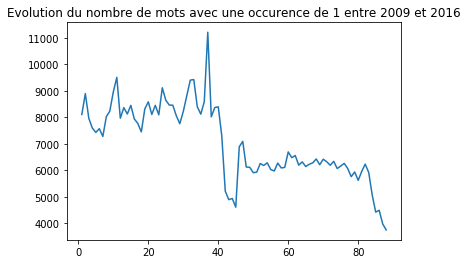

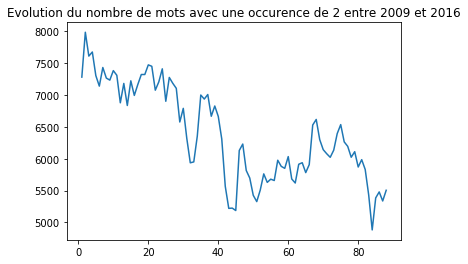

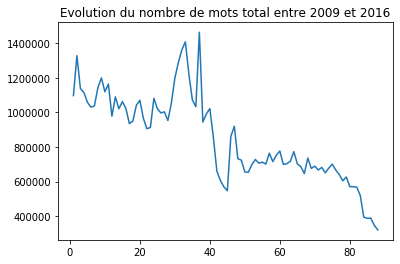

()

In [9]:
tracer_stats()